트윗의 텍스트
해당 트윗의 키워드 (비어있을 수 있습니다!)
트윗을 보낸 위치 (비어있을 수도 있음)

나는 무엇을 예측하고 있습니까?
주어진 트윗이 실제 재난에 관한 것인지 아닌지를 예측하고 있습니다. 
그렇다면 1을 예측하십시오. 그렇지 않으면 0을 예측하십시오.

< train.csv >
id-각 트윗의 고유 식별자
text-트윗의 텍스트
location-트윗을 보낸 위치 (비어있을 수 있음)\
keyword-트윗의 특정 키워드 (비어있을 수 있음)
target-train.csv에서만 트윗이 실제 재해에 관한 것인지 (1) 아닌지 (0)를 나타냅니다.

< test.csv >
id-각 트윗의 고유 식별자
text-트윗의 텍스트
location-트윗을 보낸 위치 (비어있을 수 있음)
keyword-트윗의 특정 키워드 (비어있을 수 있음)

In [104]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# 그래프를 쥬피터에서 바로 그리게 하는 방법

In [106]:
train_df = pd.read_csv('c:/kaggle/nlp-getting-started/train.csv')
test_df = pd.read_csv('c:/kaggle/nlp-getting-started/test.csv')
submission = pd.read_csv('c:/kaggle/nlp-getting-started/sample_submission.csv') 
    

In [107]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [108]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [110]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [111]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [112]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [113]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [114]:
train_df[train_df["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

In [115]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [116]:
## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

In [117]:
## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [118]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()

In [119]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])

In [120]:
## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

In [121]:
print(count_vectorizer.vocabulary_)

{'our': 14003, 'deeds': 5490, 'are': 2192, 'the': 18669, 'reason': 15678, 'of': 13681, 'this': 18777, 'earthquake': 6379, 'may': 12141, 'allah': 1852, 'forgive': 7661, 'us': 19774, 'all': 1851, 'forest': 7652, 'fire': 7439, 'near': 13122, 'la': 11091, 'ronge': 16266, 'sask': 16611, 'canada': 3843, 'residents': 15940, 'asked': 2312, 'to': 18971, 'shelter': 17022, 'in': 9718, 'place': 14612, 'being': 2900, 'notified': 13423, 'by': 3698, 'officers': 13701, 'no': 13335, 'other': 13987, 'evacuation': 6909, 'or': 13919, 'orders': 13936, 'expected': 7014, '13': 176, '000': 1, 'people': 14389, 'receive': 15699, 'wildfires': 20607, 'california': 3797, 'just': 10550, 'got': 8364, 'sent': 16870, 'photo': 14500, 'from': 7823, 'ruby': 16379, 'alaska': 1800, 'as': 2280, 'smoke': 17394, 'pours': 14821, 'into': 9947, 'school': 16700, 'rockyfire': 16219, 'update': 19722, 'hwy': 9399, '20': 343, 'closed': 4462, 'both': 3346, 'directions': 5819, 'due': 6248, 'lake': 11118, 'county': 4915, 'cafire': 3768,

In [122]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [123]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.59421842, 0.56498283, 0.64149093])

In [124]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier()

In [125]:
submission["target"] = clf.predict(test_vectors)

In [126]:
submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [127]:
submission.tail()

,id,target
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
3262,10875,0


In [128]:
submission.to_csv("c:/kaggle/nlp-getting-started/submission.csv", index=False)

In [129]:
example_train_vectors = tfidf_vectorizer.fit_transform(train_df["text"][0:5])

In [130]:
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0.         0.         0.         0.23336118 0.28924517 0.23336118
  0.         0.         0.         0.         0.         0.
  0.28924517 0.28924517 0.         0.         0.         0.
  0.28924517 0.         0.         0.         0.         0.
  0.         0.28924517 0.         0.         0.         0.28924517
  0.         0.         0.         0.         0.28924517 0.
  0.         0.         0.         0.28924517 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.28924517 0.23336118 0.         0.28924517 0.        ]]


In [131]:
train_vectors = tfidf_vectorizer.fit_transform(train_df["text"])
test_vectors = tfidf_vectorizer.transform(test_df["text"])

In [132]:
clf = linear_model.RidgeClassifier()

In [133]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.63366337, 0.6122449 , 0.68442211])

In [134]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier()

In [135]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [136]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [137]:
test_df.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [138]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [139]:
(train_df['target'] == 0).sum()

4342

In [140]:
(train_df['target'] == 1).sum()

3271

In [141]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [142]:
submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [50]:
#test_data = ['Our vectors are really big','so we want to push our model', 'weights toward 0 without completely discounting different words ']
#count_vectorizer = CountVectorizer()
#count_vectorizer.fit(test_data)
#print(count_vectorizer.vocabulary_)

In [143]:
train_length = train_df['text'].apply(len)

C:\Users\phyon\.conda\envs\py3_7_6\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of Text')

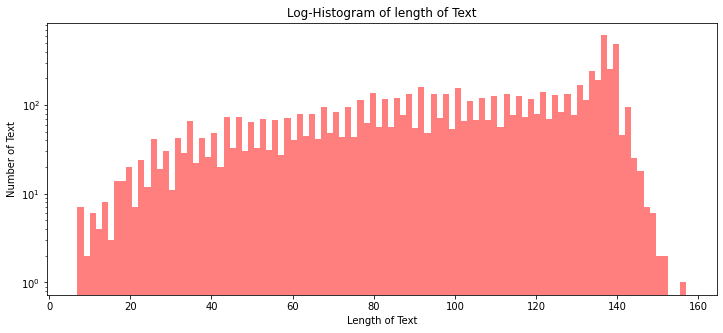

In [144]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=100, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of Text')
plt.xlabel('Length of Text')
plt.ylabel('Number of Text')

In [145]:
print('트윗 문자 길이 최대값: {}'.format(np.max(train_length)))
print('트윗 문자 길이 최소값: {}'.format(np.min(train_length)))
print('트윗 문자 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('트윗 문자 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('트윗 문자 길이 중간값: {}'.format(np.median(train_length)))

print('트윗 문자 길이 제 1사분위: {}'.format(np.percentile(train_length, 25)))
print('트윗 문자 길이 제 3사분위: {}'.format(np.percentile(train_length, 75)))

트윗 문자 길이 최대값: 157
트윗 문자 길이 최소값: 7
트윗 문자 길이 평균값: 101.04
트윗 문자 길이 표준편차: 33.78
트윗 문자 길이 중간값: 107.0
트윗 문자 길이 제 1사분위: 78.0
트윗 문자 길이 제 3사분위: 133.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b98b1a2cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b98b1a2288>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b98aaf6448>],
 'medians': [<matplotlib.lines.Line2D at 0x1b98b1a2d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b98b1a2788>],
 'means': [<matplotlib.lines.Line2D at 0x1b98b223e48>]}

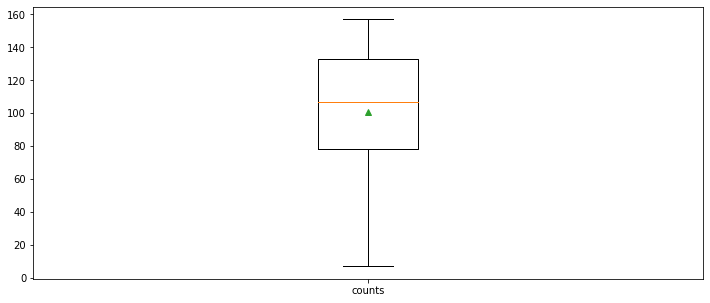

In [146]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [147]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

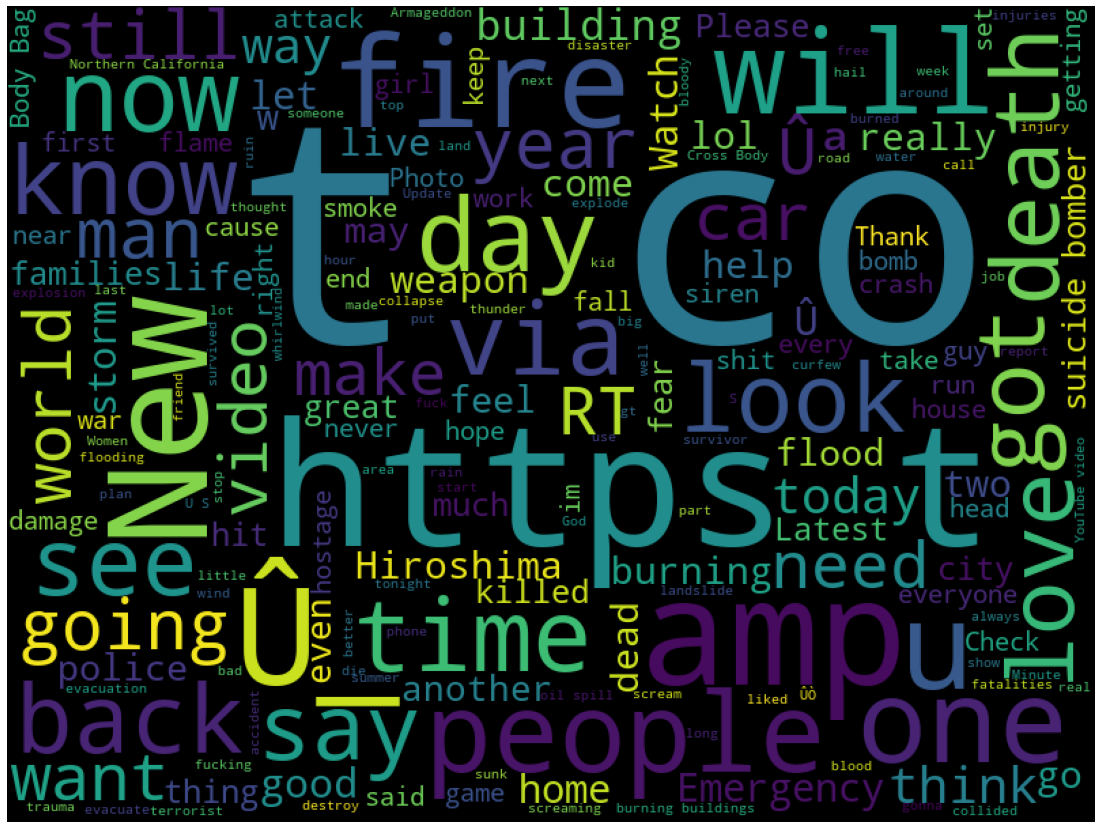

In [148]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train_df['text']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

C:\Users\phyon\.conda\envs\py3_7_6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

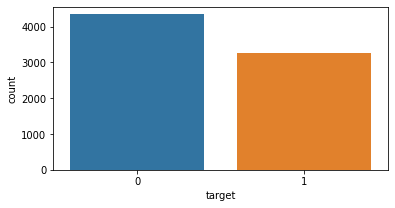

In [149]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['target'])

In [150]:
print('실제 재난 개수: {}'.format(train_df['target'].value_counts()[1]))
print('재난 아닌 개수: {}'.format(train_df['target'].value_counts()[0]))

실제 재난 개수: 3271
재난 아닌 개수: 4342


In [151]:
train_word_counts = train_df['text'].apply(lambda x:len(x.split(' ')))

C:\Users\phyon\.conda\envs\py3_7_6\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of Text')

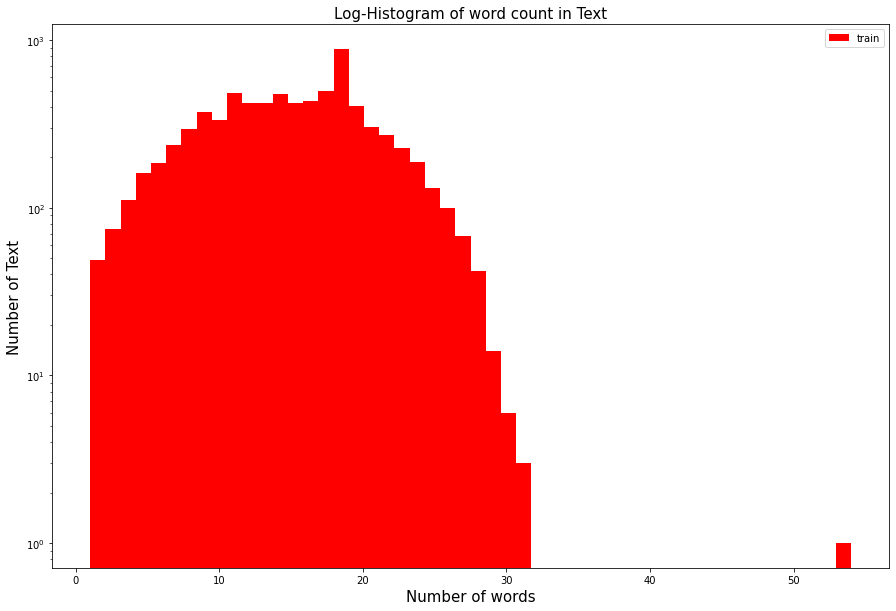

In [152]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of word count in Text', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of Text', fontsize=15)

In [153]:
print('트윗 단어 개수 최대값: {}'.format(np.max(train_word_counts)))
print('트윗 단어 개수 최소값: {}'.format(np.min(train_word_counts)))
print('트윗 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('트윗 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('트윗 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

print('트윗 단어 개수 제 1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('트윗 단어 개수 제 3사분위: {}'.format(np.percentile(train_word_counts, 75)))

트윗 단어 개수 최대값: 54
트윗 단어 개수 최소값: 1
트윗 단어 개수 평균값: 14.93
트윗 단어 개수 표준편차: 5.78
트윗 단어 개수 중간값: 15.0
트윗 단어 개수 제 1사분위: 11.0
트윗 단어 개수 제 3사분위: 19.0


In [154]:
qmarks = np.mean(train_df['text'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_df['text'].apply(lambda x: '.' in x))
capital_first = np.mean(train_df['text'].apply(lambda x: x[0].isupper())) # 첫글자가 대문자
capitals = np.mean(train_df['text'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자 개수
numbers = np.mean(train_df['text'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자 개수

print('물음표가 있는 트윗:{:2f}%'.format(qmarks * 100))
print('마침표가 있는 트윗:{:2f}%'.format(fullstop * 100))
print('첫글자가 대문자인 트윗:{:2f}%'.format(capital_first * 100))
print('대문자가 있는 트윗:{:2f}%'.format(capitals * 100))
print('숫자가 있는 트윗:{:2f}%'.format(numbers * 100))

물음표가 있는 트윗:13.687114%
마침표가 있는 트윗:74.582950%
첫글자가 대문자인 트윗:64.508078%
대문자가 있는 트윗:96.348352%
숫자가 있는 트윗:59.437804%


In [155]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


In [156]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phyon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
print(train_df['text'][0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


In [158]:
text = train_df['text'][0]
tweet_text = BeautifulSoup(text, "html").get_text() # HTML 태그 제거
tweet_text = re.sub("[^a-zA-Z]", " ", tweet_text)  # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다


In [159]:
print(tweet_text)

Our Deeds are the Reason of this  earthquake May ALLAH Forgive us all


In [160]:
stop_words = set(stopwords.words('english')) # 영어 불용어 set 을 만든다
tweet_text = tweet_text.lower()
words = tweet_text.split() # 소문자로 변환 후에 단어마다 나눠서 단어 리스트로 만든다
words = [w for w in words if not w in stop_words] # 불용어를 제거한 리스트를 만든다
print(words)

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']


In [161]:
clean_text = ' '.join(words) # 단어 리스트를 다시 하나의 글로 합친다
print(clean_text)

deeds reason earthquake may allah forgive us


In [162]:
def preprocessing(text, remove_stopwords = False):
    tweet_text = BeautifulSoup(text, "html").get_text()  # HTML 태그 제거
    tweet_text = re.sub("[^a-zA-Z]", " ", tweet_text) # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다
    words = tweet_text.split() # 소문자로 변환 후에 단어마다 나눠서 단어 리스트로 만든다
    if remove_stopwords:
        stops = set(stopwords.words('english')) # 영어 불용어 set 을 만든다
        words = [w for w in words if not w in stops] # 불용어를 제거한 리스트를 만든다
        clean_text = ' '.join(words) # 단어 리스트를 다시 하나의 글로 합친다
    else:  # 불용어를 제거하지 않을때는 
        clean_text = ' '.join(words)
    return clean_text


In [163]:
clean_train_texts = []
for text in train_df['text']:
    clean_train_texts.append(preprocessing(text, remove_stopwords = True))
    
clean_train_texts[0]

'Our Deeds Reason earthquake May ALLAH Forgive us'

In [164]:
clean_train_df = pd.DataFrame({'text':clean_train_texts, 'target':train_df['target']})


In [165]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_texts)   # 텍스트가 인덱스의 벡터값으로 벼환이 됨
text_sequences = tokenizer.texts_to_sequences(clean_train_texts)

In [166]:
print(text_sequences[0])  # 각 단어의 인덱스 값으로 출력

[605, 4716, 794, 209, 89, 1550, 4717, 30]


In [167]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0  # word_index 에는 패딩 정보값이 정의가 안되어 있어서 '<PAD' 에 인덱스 값을 0으로 한다.
print(word_vocab)

{'co': 1, 'http': 2, 'i': 3, 'the': 4, 'https': 5, 'a': 6, 'like': 7, 'fire': 8, 'get': 9, 'new': 10, 'via': 11, 'u': 12, 'news': 13, 'in': 14, 'people': 15, 'one': 16, 'w': 17, 'it': 18, 'video': 19, 'disaster': 20, 'emergency': 21, 's': 22, 'you': 23, 'p': 24, 'x': 25, 'police': 26, 'c': 27, 'r': 28, 'would': 29, 'us': 30, 'to': 31, 'time': 32, 'body': 33, 'this': 34, 'b': 35, 'still': 36, 'my': 37, 'we': 38, 'is': 39, 'e': 40, 'california': 41, 'n': 42, 'storm': 43, 'burning': 44, 'crash': 45, 'day': 46, 'back': 47, 'suicide': 48, 'm': 49, 'man': 50, 'got': 51, 'rt': 52, 'know': 53, 'buildings': 54, 'l': 55, 'pm': 56, 'first': 57, 'and': 58, 'world': 59, 'see': 60, 'go': 61, 'v': 62, 'bomb': 63, 'going': 64, 'nuclear': 65, 'two': 66, 'h': 67, 'love': 68, 'fires': 69, 'g': 70, 'if': 71, 'attack': 72, 'today': 73, 'dead': 74, 'killed': 75, 'year': 76, 'k': 77, 'youtube': 78, 'car': 79, 'q': 80, 'hiroshima': 81, 'full': 82, 'life': 83, 'of': 84, 'train': 85, 'old': 86, 'war': 87, 'let'

In [168]:
print('전체 단어 개수:', len(word_vocab))

전체 단어 개수: 22109


In [169]:
data_configs = {}
data_configs['vocab'] = word_vocab  #vocab 컬럼을 생성하고 단어사전 저장
data_configs['vocab_size'] = len(word_vocab)   #vocab_size 컬럼을 생성하고 전체 단어개수 저장

마지막 전처리 단계-서로 길이가 다른 데이터 길이를 통일을 해야 모델에 적용이 용이함.

In [170]:
MAX_SEQUENCE_LENGTH = 110  # 한 문장의 최대 길이 지정
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
    # 길이가 짧은 문장은 패딩 처리를 하여 0 값으로 채운다. 이유는 길이가 유별나게 길면 평균치가 상승을 하므로
    # 적당한 중간값을 사용을 해서 길이를 맞추어 준다. 
print('Shape of train data :', train_inputs.shape)  #  길이가 110 이고 7613개의 문장이 저장되어 있다

Shape of train data : (7613, 110)


정답을 나타내는 값을 넘파이 배열로 저장한다. 이유는 전처리한 데이터를 넘파이 형태로 저장하기 때문에 맞추어준다

In [171]:
train_labels = np.array(train_df['target'])
print('Shape of label tensor :', train_labels.shape) # 7613개의 벡터 임

Shape of label tensor : (7613,)


In [172]:
DATA_IN_PATH = 'c:/data_in/'
TRAIN_INPUT_DATA = 'tweet_train_input.npy'
TRAIN_LABEL_DATA = 'tweet_train_label.npy'
TRAIN_CLEAN_DATA = 'tweet_train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

# 저장하는 디렉토리가 존재하지 않으면 새로 생성해줌
if not os.path.exists(DATA_IN_PATH):     
    os.makedirs(DATA_IN_PATH)   
    

여기까지 학습데이타에 대한 전처리 작업이 끝났고 저장하고 이후 평가 데이터에 대한 전처리를 동일한 과정으로 진행 하면 된다. 단, 평가 데이터의 경우는 라벨 값이 없으므로 라밸은 따로 저장하지 않아도 되고, 데이터 정보인 단어 사전과 단어 개수에 대한 정보도 학습 데이터의 것을 사용하므로 따로 저장하지 않아도 된다

In [173]:
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb' ), train_inputs)  # 넘파이 파일로 저장
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb' ), train_labels)

clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False )  # csv 파일로 저장

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False) # json 파일로 저장

In [182]:
test_data = pd.read_csv('c:/kaggle/nlp-getting-started/test.csv')
clean_test_texts = []

In [183]:
for text in test_data['text']:
    clean_test_texts.append(preprocessing(text, remove_stopwords = True))

In [184]:
# 평가 데이터는 트윗 데이터에 대한 'id' 값을 저장해야한다.
clean_test_df = pd.DataFrame({'id':test_data['id'], 'text':clean_test_texts})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_texts)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
# ** 토크나이저를 통해 인덱스 벡터로 만들때, 반드시 기존에 학습데이터에 적용한 토크나이저 객체를 사용해야 한다. 
# 이유는 새롭게 만들 경우 학습데이터와 평가 데이터에 대한 각 단어들의 인덱스 값이 달라져서 모델에 정상적으로
# 적용할 수가 없다.

In [185]:
TEST_INPUT_DATA = 'tweet_test_input.npy'
TEST_CLEAN_DATA = 'tweet_test_clean.csv'
TEST_ID_DATA = 'tweet_test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb' ), test_inputs)  # 넘파이 파일로 저장
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb' ), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index=False )  # csv 파일로 저장

모델링 시작

In [186]:
train = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
texts = list(train['text'])
targets = list(train['target'])

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True,
                            ngram_range=(1,3), max_features=5000)
X = vectorizer.fit_transform(texts)

In [188]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(targets)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT,
                                                   random_state=RANDOM_SEED)

In [189]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [190]:
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.776100


In [191]:
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA) # delimiter 옵션 추후 체크

In [192]:
testDataVecs = vectorizer.transform(test_data['text'])

In [193]:
test_data.head()

,id,text
0,0,Just happened terrible car crash
1,2,Heard earthquake different cities stay safe ev...
2,3,forest fire spot pond geese fleeing across str...
3,9,Apocalypse lighting Spokane wildfires
4,11,Typhoon Soudelor kills China Taiwan


In [194]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 1 1 ... 1 1 1]


In [195]:
DATA_OUT_PATH = 'c:/data_out/'

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
ids = list(test_data['id'])    
answer_dataset = pd.DataFrame({'id':ids, 'target':test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'submission.csv', index=False)